In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool

In [43]:
train_update = pd.read_csv('./kaggle/input/spaceship-titanic/train_update.csv')
test_update = pd.read_csv('./kaggle/input/spaceship-titanic/test_update.csv')

In [7]:
x = train_update.drop(['Transported','testset','Name','PassengerId'],axis=1)
y = train_update['Transported']

x.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'TotalSpend'],
      dtype='object')

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('./kaggle/input/spaceship-titanic/train_update.csv')
# df = pd.read_csv('./kaggle/input/spaceship-titanic/test_update.csv')

def selectscaler(scaler_name):
    global X_train,X_test,y_train,y_test
    
    X_train, X_test, y_train, y_test = \
    train_test_split(df.drop(['PassengerId','Transported','Name','testset'],axis=1),df['Transported'], test_size=0.2, random_state=42)

    if scaler_name == 'StandardScaler':
        #StandardScaler
        scaler = StandardScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('StandardScaler Results')
    
    elif scaler_name == "MinMaxScaler":
        # MinMaxScaler
        scaler = MinMaxScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('MinMaxScaler Results')

    elif scaler_name == "RobustScaler":
        # RobustScaler
        scaler = RobustScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        
        return print('RobustScaler Results')
    else:
        return print('Results not scaled, Please use : StandardScaler,MinMaxScaler,RobustScaler')

selectscaler('MinMaxScaler')

MinMaxScaler Results


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Learning rate set to 0.009472
0:	learn: 0.7611872	total: 4.08ms	remaining: 12.2s
1:	learn: 0.7778672	total: 6.8ms	remaining: 10.2s
2:	learn: 0.7851145	total: 9.34ms	remaining: 9.33s
3:	learn: 0.7814333	total: 12.1ms	remaining: 9.1s
4:	learn: 0.7803980	total: 14.7ms	remaining: 8.82s
5:	learn: 0.7782124	total: 17.7ms	remaining: 8.83s
6:	learn: 0.7740711	total: 20.4ms	remaining: 8.73s
7:	learn: 0.7774071	total: 23.2ms	remaining: 8.66s
8:	learn: 0.7698148	total: 25.6ms	remaining: 8.52s
9:	learn: 0.7701599	total: 28.4ms	remaining: 8.48s
10:	learn: 0.7701599	total: 31ms	remaining: 8.42s
11:	learn: 0.7732658	total: 33.7ms	remaining: 8.4s
12:	learn: 0.7771770	total: 36.5ms	remaining: 8.39s
13:	learn: 0.7786725	total: 39.2ms	remaining: 8.36s
14:	learn: 0.7801680	total: 41.8ms	remaining: 8.32s
15:	learn: 0.7820085	total: 44.5ms	remaining: 8.3s
16:	learn: 0.7829288	total: 47.2ms	remaining: 8.28s
17:	learn: 0.7824687	total: 50ms	remaining:

C:\Users\deepBlue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


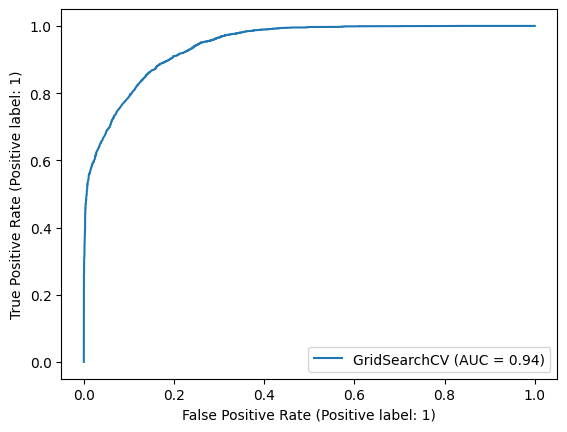

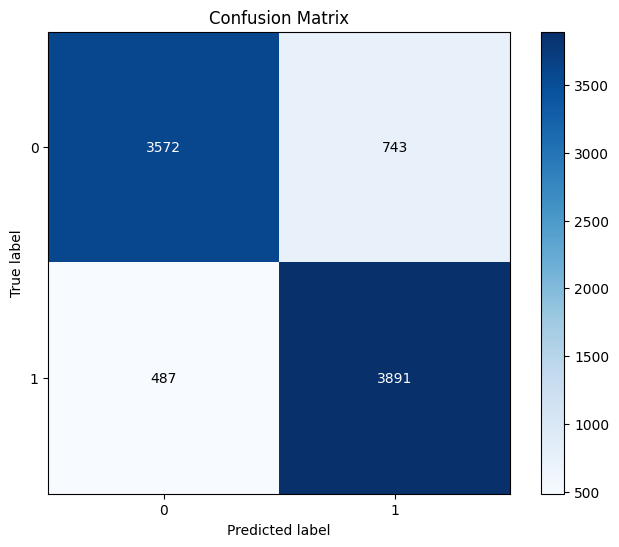

In [31]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import confusion_matrix 
import scikitplot as skplt 
import joblib

estimator = CatBoostClassifier()

eval_metric_list = ['Logloss','Accuracy']
parameter = {
'iterations' : [3000],
'eval_metric': eval_metric_list
}

model = GridSearchCV(estimator, param_grid=parameter, cv=3, verbose=1, n_jobs=-1, refit=True)
model.fit(x,y)

from sklearn.metrics import roc_auc_score
pred = model.predict(x)
roc_auc_score(y,pred)


from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, x, y)


cm = confusion_matrix(y, pred) 
print('confusion_matrix : \n', cm) 
skplt.metrics.plot_confusion_matrix(y,pred,figsize=(8,6)) 
plt.show()

In [32]:
# 모델 데이터 저장
from MyModule import girdcvconv as gc

pred = model.predict(x)
test_score = roc_auc_score(y,pred)

gc.paramsTocsv(data_name='train_update', scaler='None', model_name='CatBoostClassifier01', best_params=model.best_params_, best_score=model.best_score_, testset_score=test_score)

In [33]:
# 모델 저장
model_path = './' + 'model/' + 'CatBoostClassifier01' +'.model'
# model.save_model(model_path)
joblib.dump(model, open(model_path, 'wb'))

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y.values,pred))

0.8585068445875992


In [35]:
test_update.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'TotalSpend', 'Name', 'Transported', 'testset'],
      dtype='object')

In [38]:
import joblib
# 모델 불러오기
model_path = './' + 'model/' +'CatBoostClassifier01' +'.model'
model = joblib.load(open(model_path,'rb'))

In [42]:
# test_update.info()
# test_update.drop(['Transported','testset','Name','PassengerId'],axis=1).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   4277 non-null   object
 1   HomePlanet    4277 non-null   object
 2   CryoSleep     4277 non-null   object
 3   Cabin_A       4277 non-null   object
 4   Cabin_B       4277 non-null   object
 5   Cabin_C       4277 non-null   object
 6   Cabin_D       4277 non-null   object
 7   Cabin_E       4277 non-null   object
 8   Cabin_F       4277 non-null   object
 9   Cabin_G       4277 non-null   object
 10  Cabin_T       4277 non-null   object
 11  Destination   4277 non-null   object
 12  Age           4277 non-null   object
 13  VIP           4277 non-null   object
 14  RoomService   4277 non-null   object
 15  FoodCourt     4277 non-null   object
 16  ShoppingMall  4277 non-null   object
 17  Spa           4277 non-null   object
 18  VRDeck        4277 non-null   object
 19  TotalS

In [46]:
pred = model.predict(test_update.drop(['Transported','testset','Name','PassengerId'],axis=1))

In [47]:
test_update['Transported'] = pred
test_update = test_update.replace({0:'False', 1:'True'})
df01 = test_update[['PassengerId','Transported']]

In [48]:
df_sub = pd.read_csv('./kaggle/input/spaceship-titanic/sample_submission.csv')
df_sub = df_sub.drop(['Transported'],axis=1)

In [23]:
df_sub1 = pd.merge(df_sub, df01, how='outer', on = 'PassengerId')
df_sub1.isnull().sum()

PassengerId    0
Transported    0
dtype: int64

In [49]:
df_sub1.to_csv('./submission_cat03.csv', index=False)